# Install Dependencies:


1.   Java 8
2.   Apache Spark with hadoop and
3.   Findspark (used to locate the spark in the system)


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

Set Environment Variables:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

<a id='exploring-the-dataset'></a>
## Exploring the Datasets

<a id='loading-the-dataset'></a>
<a id='categories-dataset'></a>
### Loading the Dataset Categories

In [ ]:
# Load data
categories = spark.read.csv('/content/Categories.csv', header=True, sep=",",inferSchema=True)
categories.show(5)

+--------+-------+--------------------+------------+
|UCR_CODE|UCR_EXT|             OFFENCE|MCI_CATEGORY|
+--------+-------+--------------------+------------+
|    1480|    110|Administering Nox...|     Assault|
|    1462|    100|Aggravated Aslt P...|     Assault|
|    1410|    100|  Aggravated Assault|     Assault|
|    1410|    110|Aggravated Assaul...|     Assault|
|    1450|    110|Air Gun Or Pistol...|     Assault|
+--------+-------+--------------------+------------+
only showing top 5 rows



### Basic Explorations on Categories(columns, rows, and info)

In [ ]:
# show the list of columns
categories.columns

['UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY']

In [ ]:
#using printSchema()
categories.printSchema()


root
 |-- UCR_CODE: integer (nullable = true)
 |-- UCR_EXT: integer (nullable = true)
 |-- OFFENCE: string (nullable = true)
 |-- MCI_CATEGORY: string (nullable = true)



In [ ]:
# count the number of rows in the DataFrame
num_rows = categories.count()

# count the number of columns in the DataFrame
num_cols = len(categories.columns)

# print the shape of the DataFrame
print("Shape of DataFrame: ({},{})".format(num_rows, num_cols))

Shape of DataFrame: (51,4)


In [ ]:
from pyspark.sql.functions import count, when, col

# check for null values in all columns
categories.select([count(when(col(c).isNull(), c)).alias(c) for c in categories.columns]).show()


+--------+-------+-------+------------+
|UCR_CODE|UCR_EXT|OFFENCE|MCI_CATEGORY|
+--------+-------+-------+------------+
|       0|      0|      0|           0|
+--------+-------+-------+------------+



<a id='loading-the-dataset'></a>
<a id='categories-dataset'></a>
### Loading the Dataset Neighborhood

In [ ]:
# Load data
hood = spark.read.csv('/content/Neighborhood.csv', header=True, sep=",",inferSchema=True)
hood.show(5)

+--------+--------------------+---------------+--------------+
|HOOD_158|   NEIGHBOURHOOD_158|HOOD_LONG_WGS84|HOOD_LAT_WGS84|
+--------+--------------------+---------------+--------------+
|       1|West Humber-Clair...|   -79.59686886|   43.72084053|
|      10|  Princess-Rosethorn|   -79.54710872|   43.66879011|
|     100|      Yonge-Eglinton|   -79.40118196|    43.7052197|
|     101|   Forest Hill South|   -79.41581235|   43.69408893|
|     102|   Forest Hill North|   -79.42831864|   43.70341119|
+--------+--------------------+---------------+--------------+
only showing top 5 rows



### Basic Explorations Neighborhood (columns, rows, and info)

In [ ]:
# show the list of columns
hood.columns

['HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_LONG_WGS84', 'HOOD_LAT_WGS84']

In [ ]:
#using printSchema()
hood.printSchema()


root
 |-- HOOD_158: integer (nullable = true)
 |-- NEIGHBOURHOOD_158: string (nullable = true)
 |-- HOOD_LONG_WGS84: double (nullable = true)
 |-- HOOD_LAT_WGS84: double (nullable = true)



In [ ]:
# count the number of rows in the DataFrame
num_rows = hood.count()

# count the number of columns in the DataFrame
num_cols = len(hood.columns)

# print the shape of the DataFrame
print("Shape of DataFrame: ({},{})".format(num_rows, num_cols))

Shape of DataFrame: (158,4)


In [ ]:
from pyspark.sql.functions import count, when, col

# check for null values in all columns
hood.select([count(when(col(c).isNull(), c)).alias(c) for c in hood.columns]).show()


+--------+-----------------+---------------+--------------+
|HOOD_158|NEIGHBOURHOOD_158|HOOD_LONG_WGS84|HOOD_LAT_WGS84|
+--------+-----------------+---------------+--------------+
|       0|                0|              0|             0|
+--------+-----------------+---------------+--------------+



In [ ]:
# Count duplicates
dup_count = hood.groupBy(hood.columns).count().filter("count > 1").count()

print("Number of duplicates: ", dup_count)

Number of duplicates:  0


<a id='loading-the-dataset'></a>
<a id='categories-dataset'></a>
### Loading the Dataset Premisses

In [ ]:
# Load data
premisses = spark.read.csv('/content/Premisses.csv', header=True, sep=",",inferSchema=True)
premisses.show(5)

+-----------+-------------+--------------------+
|LOCATION_ID|PREMISES_TYPE|       LOCATION_TYPE|
+-----------+-------------+--------------------+
|        A-1|    Apartment|Apartment Rooming...|
|        C-1|   Commercial|Bank And Other Fi...|
|        C-2|   Commercial|    Baror Restaurant|
|        C-3|   Commercial|Commercial Dwelli...|
|        C-4|   Commercial|Construction Site...|
+-----------+-------------+--------------------+
only showing top 5 rows



### Basic Explorations on Premisses (columns, rows, and info)

In [ ]:
# show the list of columns
premisses.columns

['LOCATION_ID', 'PREMISES_TYPE', 'LOCATION_TYPE']

In [ ]:
#using printSchema()
premisses.printSchema()


root
 |-- LOCATION_ID: string (nullable = true)
 |-- PREMISES_TYPE: string (nullable = true)
 |-- LOCATION_TYPE: string (nullable = true)



In [ ]:
# count the number of rows in the DataFrame
num_rows = premisses.count()

# count the number of columns in the DataFrame
num_cols = len(premisses.columns)

# print the shape of the DataFrame
print("Shape of DataFrame: ({},{})".format(num_rows, num_cols))

Shape of DataFrame: (52,3)


In [ ]:
from pyspark.sql.functions import count, when, col

# check for null values in all columns
premisses.select([count(when(col(c).isNull(), c)).alias(c) for c in premisses.columns]).show()


+-----------+-------------+-------------+
|LOCATION_ID|PREMISES_TYPE|LOCATION_TYPE|
+-----------+-------------+-------------+
|          0|            0|            0|
+-----------+-------------+-------------+



In [ ]:
# Count duplicates
dup_count = premisses.groupBy(premisses.columns).count().filter("count > 1").count()

print("Number of duplicates: ", dup_count)

Number of duplicates:  0


<a id='loading-the-dataset'></a>
<a id='categories-dataset'></a>
### Loading the Dataset Incidents

In [ ]:
# Load data
incidents = spark.read.csv('/content/v3offences.csv', header=True, sep=",",inferSchema=True)
incidents.show(5)

+---------+---------------+-----------+--------+--------+-----------+--------+-------+--------+
|OBJECT_ID|EVENT_UNIQUE_ID|REPORT_DATE|OCC_DATE|DIVISION|PRESMISE_ID|UCR_CODE|UCR_EXT|HOOD_158|
+---------+---------------+-----------+--------+--------+-----------+--------+-------+--------+
|        1| GO-20141262074|   1/1/2014|6/1/1998|     D32|        A-1|    1480|    110|      38|
|        2| GO-20141260701|   1/1/2014|1/1/2014|     D51|        C-3|    2120|    200|      70|
|        3| GO-20141260889|   1/1/2014|1/1/2014|     D51|        A-1|    1430|    100|      74|
|        4| GO-20141261050|   1/1/2014|1/1/2014|     D54|       OU-3|    1430|    100|      69|
|        5| GO-20141259344|   1/1/2014|1/1/2014|     D52|        C-2|    1420|    110|     164|
+---------+---------------+-----------+--------+--------+-----------+--------+-------+--------+
only showing top 5 rows



### Basic Explorations on Incidents (columns, rows, and info)

In [ ]:
# show the list of columns
incidents.columns

['OBJECT_ID',
 'EVENT_UNIQUE_ID',
 'REPORT_DATE',
 'OCC_DATE',
 'DIVISION',
 'PRESMISE_ID',
 'UCR_CODE',
 'UCR_EXT',
 'HOOD_158']

In [ ]:
#using printSchema()
incidents.printSchema()


root
 |-- OBJECT_ID: integer (nullable = true)
 |-- EVENT_UNIQUE_ID: string (nullable = true)
 |-- REPORT_DATE: string (nullable = true)
 |-- OCC_DATE: string (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- PRESMISE_ID: string (nullable = true)
 |-- UCR_CODE: integer (nullable = true)
 |-- UCR_EXT: integer (nullable = true)
 |-- HOOD_158: integer (nullable = true)



In [ ]:
  # change the date type from string to data
from pyspark.sql.functions import to_date

incidents = incidents.withColumn("REPORT_DATE", to_date("REPORT_DATE", 'M/d/y')) \
                     .withColumn("OCC_DATE", to_date("OCC_DATE", 'M/d/y'))



In [ ]:
# from pyspark.sql.functions import to_timestamp

# formatted_incidents = incidents \
#     .withColumn('REPORT_DATE', to_timestamp('REPORT_DATE', 'yyyy/MM/dd HH:mm:ssX')) \
#     .withColumn('OCC_DATE', to_timestamp('OCC_DATE', 'yyyy/MM/dd HH:mm:ssX'))

# incidents = formatted_incidents


In [ ]:
#using printSchema()
incidents.printSchema()


root
 |-- OBJECT_ID: integer (nullable = true)
 |-- EVENT_UNIQUE_ID: string (nullable = true)
 |-- REPORT_DATE: date (nullable = true)
 |-- OCC_DATE: date (nullable = true)
 |-- DIVISION: string (nullable = true)
 |-- PRESMISE_ID: string (nullable = true)
 |-- UCR_CODE: integer (nullable = true)
 |-- UCR_EXT: integer (nullable = true)
 |-- HOOD_158: integer (nullable = true)



In [ ]:
incidents.show(5)

+---------+---------------+-----------+----------+--------+-----------+--------+-------+--------+
|OBJECT_ID|EVENT_UNIQUE_ID|REPORT_DATE|  OCC_DATE|DIVISION|PRESMISE_ID|UCR_CODE|UCR_EXT|HOOD_158|
+---------+---------------+-----------+----------+--------+-----------+--------+-------+--------+
|        1| GO-20141262074| 2014-01-01|1998-06-01|     D32|        A-1|    1480|    110|      38|
|        2| GO-20141260701| 2014-01-01|2014-01-01|     D51|        C-3|    2120|    200|      70|
|        3| GO-20141260889| 2014-01-01|2014-01-01|     D51|        A-1|    1430|    100|      74|
|        4| GO-20141261050| 2014-01-01|2014-01-01|     D54|       OU-3|    1430|    100|      69|
|        5| GO-20141259344| 2014-01-01|2014-01-01|     D52|        C-2|    1420|    110|     164|
+---------+---------------+-----------+----------+--------+-----------+--------+-------+--------+
only showing top 5 rows



In [ ]:
# count the number of rows in the DataFrame
num_rows = incidents.count()

# count the number of columns in the DataFrame
num_cols = len(incidents.columns)

# print the shape of the DataFrame
print("Shape of DataFrame: ({},{})".format(num_rows, num_cols))

Shape of DataFrame: (294976,9)


In [ ]:
from pyspark.sql.functions import count, when, col

# check for null values in all columns
premisses.select([count(when(col(c).isNull(), c)).alias(c) for c in premisses.columns]).show()


+-----------+-------------+-------------+
|LOCATION_ID|PREMISES_TYPE|LOCATION_TYPE|
+-----------+-------------+-------------+
|          0|            0|            0|
+-----------+-------------+-------------+



In [ ]:
# Count duplicates
dup_count = incidents.groupBy(incidents.columns).count().filter("count > 1").count()

print("Number of duplicates: ", dup_count)

Number of duplicates:  0


## BOXplots

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql import SparkSession

# create spark session
spark = SparkSession.builder.appName("MCI Boxplot").getOrCreate()

# load data from csv files into dataframes
offences_df = spark.read.option("header", "true").csv("v3offences.csv")
hoods_df = spark.read.option("header", "true").csv("path/to/hoods.csv")
locations_df = spark.read.option("header", "true").csv("path/to/locations.csv")
events_df = spark.read.option("header", "true").csv("path/to/events.csv")

# # join dataframes
# joined_df = events_df.join(offences_df, ["UCR_CODE", "UCR_EXT"]) \
#                     .join(hoods_df, ["HOOD_158"]) \
#                     .join(locations_df, ["LOCATION_ID"]) \
#                     .select("MCI_CATEGORY", "HOOD_LONG_WGS84", "HOOD_LAT_WGS84", "PREMISES_TYPE", "LOCATION_TYPE")

# # filter data by MCI category
# assault_df = joined_df.filter(col("MCI_CATEGORY") == "Assault")
# break_enter_df = joined_df.filter(col("MCI_CATEGORY") == "Break and Enter")
# robbery_df = joined_df.filter(col("MCI_CATEGORY") == "Robbery")

# # create boxplot for each MCI category
# assault_df.toPandas().boxplot(column=["HOOD_LONG_WGS84", "HOOD_LAT_WGS84"], by=["PREMISES_TYPE", "LOCATION_TYPE"])
# break_enter_df.toPandas().boxplot(column=["HOOD_LONG_WGS84", "HOOD_LAT_WGS84"], by=["PREMISES_TYPE", "LOCATION_TYPE"])
# robbery_df.toPandas().boxplot(column=["HOOD_LONG_WGS84", "HOOD_LAT_WGS84"], by=["PREMISES_TYPE", "LOCATION_TYPE"])



AnalysisException: ignored

In [ ]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

# # Load tables into DataFrames
# categories_df = spark.table("categories")
# hood_df = spark.table("hood")
# premisses_df = spark.table("premisses")
# incidents_df = spark.table("incidents")

# Join tables
joined_df = incidents.join(premisses, incidents.PRESMISE_ID == premisses.LOCATION_ID, "left") \
    .join(hood, incidents.HOOD_158 == hood.HOOD_158, "left") \
    .join(categories, [incidents.UCR_CODE == categories.UCR_CODE, incidents.UCR_EXT == categories.UCR_EXT], "left")

# # Join tables
# joined_df = incidents_df.join(premisses_df, incidents_df.PRESMISE_ID == premisses_df.LOCATION_ID, "left") \
#     .join(hood_df, incidents_df.HOOD_158 == hood_df.HOOD_158, "left") \
#     .join(categories_df, [incidents_df.UCR_CODE == categories_df.UCR_CODE, incidents_df.UCR_EXT == categories_df.UCR_EXT], "left")

# # Group by MCI category and collect data for boxplot
# boxplot_data = []
# for category in joined_df.select("MCI_CATEGORY").distinct().collect():
#     category_data = joined_df.filter(col("MCI_CATEGORY") == category.MCI_CATEGORY).select("OFFENCE").rdd.flatMap(lambda x: x).collect()
#     boxplot_data.append(category_data)

# # Create boxplot
# plt.boxplot(boxplot_data, labels=joined_df.select("MCI_CATEGORY").distinct().rdd.flatMap(lambda x: x).collect())
# plt.xlabel("MCI Category")
# plt.ylabel("Offence")
# plt.title("Offences by MCI Category")
# plt.show()



In [ ]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

# Join tables
joined_df = incidents.join(premisses, incidents.PRESMISE_ID == premisses.LOCATION_ID, "left") \
                     .join(hood, incidents.HOOD_158 == hood.HOOD_158, "left") \
                     .join(categories, [incidents.UCR_CODE == categories.UCR_CODE, incidents.UCR_EXT == categories.UCR_EXT], "left")

# Group by MCI category and collect data for boxplot
boxplot_data = []
for category in joined_df.select("MCI_CATEGORY").distinct().collect():
    category_data = joined_df.filter(col("MCI_CATEGORY") == category.MCI_CATEGORY).select("OFFENCE").rdd.flatMap(lambda x: x).collect()
    boxplot_data.append(category_data)


In [ ]:
import numpy as np

# Create boxplot
labels = joined_df.select("MCI_CATEGORY").distinct().rdd.flatMap(lambda x: x).collect()
boxplot_data = [np.array(d).astype(np.float) for d in boxplot_data]
plt.boxplot(boxplot_data, labels=labels)
plt.xlabel("MCI Category")
plt.ylabel("Offence")
plt.title("Offences by MCI Category")
plt.show()

<ipython-input-42-a439af3380d3>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  boxplot_data = [np.array(d).astype(np.float) for d in boxplot_data]


ValueError: ignored

In [ ]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

# Join tables
joined_df = incidents.join(premisses, incidents.PRESMISE_ID == premisses.LOCATION_ID, "left") \
                     .join(hood, incidents.HOOD_158 == hood.HOOD_158, "left") \
                     .join(categories, [incidents.UCR_CODE == categories.UCR_CODE, incidents.UCR_EXT == categories.UCR_EXT], "left")

# Group by MCI category and collect data for boxplot
boxplot_data = []
mci_category_dict = {}
mci_category_val = 0
for category in joined_df.select("MCI_CATEGORY").distinct().collect():
    mci_category = category.MCI_CATEGORY
    if mci_category not in mci_category_dict:
        mci_category_dict[mci_category] = mci_category_val
        mci_category_val += 1
    category_data = joined_df.filter(col("MCI_CATEGORY") == mci_category).select("OFFENCE").rdd.flatMap(lambda x: x).collect()
    boxplot_data.append(category_data)

# Replace string values with numerical values
for i in range(len(boxplot_data)):
    for j in range(len(boxplot_data[i])):
        boxplot_data[i][j] = mci_category_dict[boxplot_data[i][j]]

# Create boxplot
labels = joined_df.select("MCI_CATEGORY").distinct().rdd.flatMap(lambda x: x).collect()
plt.boxplot(boxplot_data, labels=labels)
plt.xlabel("MCI Category")
plt.ylabel("Offence")
plt.title("Offences by MCI Category")
plt.show()


KeyError: ignored

## PIE Chart

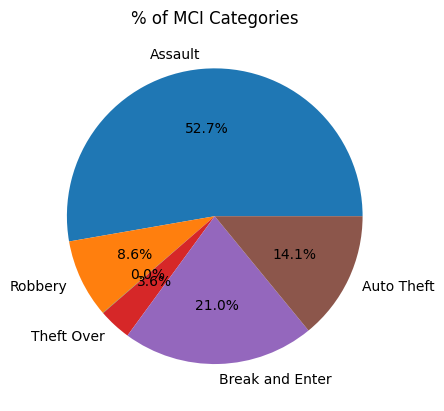

In [ ]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

# Join tables
joined_df = incidents.join(premisses, incidents.PRESMISE_ID == premisses.LOCATION_ID, "left") \
                     .join(hood, incidents.HOOD_158 == hood.HOOD_158, "left") \
                     .join(categories, [incidents.UCR_CODE == categories.UCR_CODE, incidents.UCR_EXT == categories.UCR_EXT], "left")

# Calculate percentage of MCI categories
mci_category_count = joined_df.groupBy("MCI_CATEGORY").count()
total_count = mci_category_count.agg({"count": "sum"}).collect()[0][0]
mci_category_percentages = mci_category_count.withColumn("percentage", col("count") / total_count * 100).select("MCI_CATEGORY", "percentage").collect()

# Create pie chart
labels = [row.MCI_CATEGORY for row in mci_category_percentages]
sizes = [row.percentage for row in mci_category_percentages]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("% of MCI Categories")
plt.show()


## zabre

In [147]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql import SparkSession

# create spark session
spark = SparkSession.builder.appName('Titanic Random Forest').getOrCreate()

# Select relevant columns
data = df.select('OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'MCI_CATEGORY', 'DIVISION', 'HOOD_158', 'PREMISES_TYPE')

# One-hot encode categorical variables


# # select relevant columns
# cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# data = titanic.select(cols)

# drop missing values
data = data.dropna()

# convert categorical variables to numerical
cat_cols = ['MCI_CATEGORY', 'DIVISION', 'PREMISES_TYPE', 'OCC_DOW', 'OCC_MONTH']
indexers = [StringIndexer(inputCol=col, outputCol=col+'_idx', handleInvalid='skip') for col in cat_cols]
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=indexer.getOutputCol()+'_enc') for indexer in indexers]
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]+['OCC_YEAR', 'OCC_DAY', 'OCC_DOY', 'OCC_HOUR', 'HOOD_158'], outputCol='features')

# set up pipeline
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])

# fit and transform data
data = pipeline.fit(data).transform(data)

# convert label to numeric
data = StringIndexer(inputCol='MCI_CATEGORY', outputCol='label').fit(data).transform(data)

# split into training and testing sets
(training, testing) = data.randomSplit([0.7, 0.3], seed=42)

# train random forest model
rf = RandomForestClassifier(labelCol='label', featuresCol='features', numTrees=100)
model = rf.fit(training)

# make predictions on testing data
predictions = model.transform(testing)

# evaluate model performance
evaluator = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='prediction')
auc = evaluator.evaluate(predictions)
print('AUC:', auc)


AUC: 0.9688728258414276


## XGboost

In [151]:
!pip install pysparkling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysparkling: filename=pysparkling-0.6.2-py3-none-any.whl size=185898 sha256=5732167b80a9b23df74dbd2ce1d5e25f7732b589f94b3c0ad8552505e082bf10
  Stored in directory: /root/.cache/pip/wheels/65/4e/9f/ebee95d389ea78f11338ba3fe358c09d047f065c4d6ac4cd88
Successfully built pysparkling


In [160]:
!pip install h2o-pysparkling-3-1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o-pysparkling-3-1: filename=h2o_pysparkling_3.1-3.40.0.2.post1-py2.py3-none-any.whl size=162493544 sha256=4eb451ea79ad8dca8c6da303ec0233b5379141e6ca7f4adbe55bcc7994cd2469
  Stored in directory: /root/.cache/pip/wheels/d2/eb/86/926145b57d8005a002f349f0771e5be375ecd1c1f850eb0897
Successfully built h2o-pysparkling-3-1


In [159]:
from pysparkling.ml import XGBoostClassifier

ModuleNotFoundError: ignored

In [152]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

# Create a spark session
spark = SparkSession.builder.appName('MCI XGBoost').getOrCreate()

# Select relevant columns
data = df.select('OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'MCI_CATEGORY', 'DIVISION', 'HOOD_158', 'PREMISES_TYPE')

# Drop missing values
data = data.dropna()

# Convert categorical variables to numerical
cat_cols = ['MCI_CATEGORY', 'DIVISION', 'PREMISES_TYPE', 'OCC_DOW', 'OCC_MONTH']
indexers = [StringIndexer(inputCol=col, outputCol=col+'_idx', handleInvalid='skip') for col in cat_cols]
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=indexer.getOutputCol()+'_enc') for indexer in indexers]
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]+['OCC_YEAR', 'OCC_DAY', 'OCC_DOY', 'OCC_HOUR', 'HOOD_158'], outputCol='features')

# Set up pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])

# Fit and transform data
data = pipeline.fit(data).transform(data)

# Convert label to numeric
data = StringIndexer(inputCol='MCI_CATEGORY', outputCol='label').fit(data).transform(data)

# Split into training and testing sets
(training, testing) = data.randomSplit([0.7, 0.3], seed=42)

# Train XGBoost model
from pysparkling.ml import XGBoostClassifier
xgboost = XGBoostClassifier(labelCol="label", featuresCol="features", maxDepth=8, numRound=10, objective="multi:softprob")
xgboost_model = xgboost.fit(training)

# Make predictions on testing data
predictions = xgboost_model.transform(testing)

# Evaluate model performance
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print('Accuracy:', accuracy)


ModuleNotFoundError: ignored